### Анализ потребления солнечной энергии за период

In [2]:
import pandas as pd
solar_data = pd.read_csv('../data/solarpower.csv', sep=',')
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


Есть пропуски в данных

In [3]:
solar_data[solar_data['cum_power'] == -1]

,date,cum_power
45,2017-02-15,-1.0
647,2018-10-10,-1.0


Заполним пропуски средним между значениями в соседних строках

In [4]:
for i, row in solar_data.iterrows():
    if row.cum_power == -1:
        res = (solar_data.iloc[i-1].cum_power + solar_data.iloc[i+1].cum_power)/2
        solar_data.at[i, 'cum_power'] = res

print(solar_data['cum_power'].sum())
print(solar_data['cum_power'].mean().round(2))


15835236.0
23848.25


Рассчитаем ежедневное потребление из накопительного

In [5]:
solar_data['month'] = pd.to_datetime(solar_data['date']).dt.to_period('M')
solar_data['day_power'] = solar_data['cum_power'].diff()
solar_data.head()

,date,cum_power,month,day_power
0,2017-01-01,20111.0,2017-01,NaN
1,2017-01-02,20112.0,2017-01,1.0
2,2017-01-03,20115.0,2017-01,3.0
3,2017-01-04,20117.0,2017-01,2.0
4,2017-01-05,20119.0,2017-01,2.0


Рассчитаем среднее потребление по месяцам

In [6]:
solar_data.groupby('month')['day_power'].mean()

month
2017-01     3.233333
2017-02     3.714286
2017-03    10.774194
2017-04    16.300000
2017-05    19.000000
2017-06    21.500000
2017-07    18.129032
2017-08    15.064516
2017-09    11.533333
2017-10     6.419355
2017-11     3.233333
2017-12     1.161290
2018-01     2.064516
2018-02     6.928571
2018-03     8.709677
2018-04    14.633333
2018-05    21.032258
2018-06    18.766667
2018-07    22.000000
2018-08    17.096774
2018-09    13.866667
2018-10     9.000000
Freq: M, Name: day_power, dtype: float64

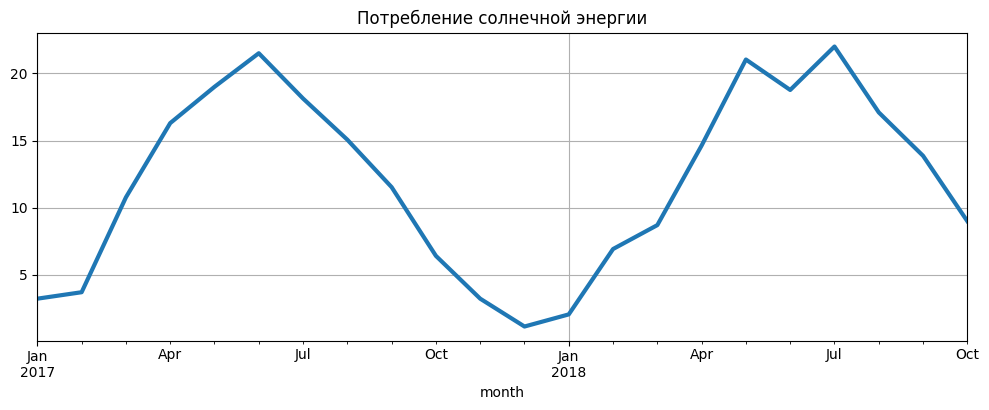

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

ddd = solar_data.groupby('month')['day_power'].mean()
ddd.plot(
    kind='line',
    figsize=(12, 4),
    title='Потребление солнечной энергии',
    grid = True,
    lw=3
);

Как видно из графика, максимальное потребление солнечной энергии приходится на лето-осень, зимой и осеньи потребление снижается почти до нуля.